<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/Polynomial_regression_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
owid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'


In [27]:
df = pd.read_csv(owid_url, usecols=['iso_code','date','total_cases','new_cases','new_deaths','total_deaths'])
df.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths
0,AFG,2020-02-24,5.0,5.0,NaN,NaN
1,AFG,2020-02-25,5.0,0.0,NaN,NaN
2,AFG,2020-02-26,5.0,0.0,NaN,NaN
3,AFG,2020-02-27,5.0,0.0,NaN,NaN
4,AFG,2020-02-28,5.0,0.0,NaN,NaN


In [29]:
mex = df[df['iso_code'] == 'MEX']
mex_nan = mex.replace(np.nan,0)
mex_nan.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths
139144,MEX,2020-01-01,0.0,0.0,0.0,0.0
139145,MEX,2020-01-02,0.0,0.0,0.0,0.0
139146,MEX,2020-01-03,0.0,0.0,0.0,0.0
139147,MEX,2020-01-04,0.0,0.0,0.0,0.0
139148,MEX,2020-01-05,0.0,0.0,0.0,0.0


In [59]:
mex_nan['recovered'] = mex_nan['total_cases'] - mex_nan['new_deaths']
mex_nan['date_num'] = np.arange(len(mex_nan))
mex_nan.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,recovered,date_num
139144,MEX,2020-01-01,0.0,0.0,0.0,0.0,0.0,0
139145,MEX,2020-01-02,0.0,0.0,0.0,0.0,0.0,1
139146,MEX,2020-01-03,0.0,0.0,0.0,0.0,0.0,2
139147,MEX,2020-01-04,0.0,0.0,0.0,0.0,0.0,3
139148,MEX,2020-01-05,0.0,0.0,0.0,0.0,0.0,4


In [31]:
mex_nan.describe()

,total_cases,new_cases,total_deaths,new_deaths,recovered,date_num
count,1.083000e+03,1083.000000,1083.000000,1083.000000,1.083000e+03,1083.000000
mean,3.092214e+06,6638.975069,197774.247461,298.955679,3.091915e+06,541.000000
std,2.459153e+06,10669.233388,123438.319570,353.780608,2.459273e+06,312.779475
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,7.320170e+05,388.500000,76516.500000,8.000000,7.318370e+05,270.500000
50%,2.498357e+06,3891.000000,232346.000000,181.000000,2.498079e+06,541.000000
75%,5.636054e+06,7172.500000,322119.000000,489.500000,5.636040e+06,811.500000
max,7.188862e+06,109895.000000,330795.000000,3050.000000,7.188862e+06,1082.000000


In [32]:
X = mex_nan['date_num'].values
y = mex_nan['total_cases'].values

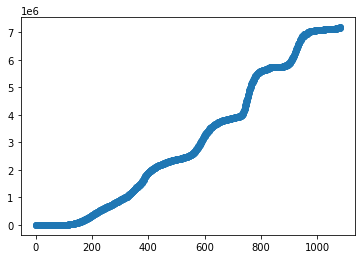

In [33]:
plt.scatter(X, y)

Total de casos

In [60]:
X = mex_nan['date_num'].values.reshape(-1,1)
y = mex_nan['total_cases'].values.reshape(-1,1)
poly=PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

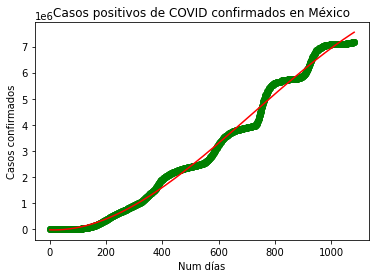

RMSE is 203446.68205718262
r2 is 0.9931493555814364


In [61]:
plt.scatter(X, y, color='green')
plt.plot(X, y_poly_pred, color='red')
plt.title('Casos positivos de COVID confirmados en México')
plt.xlabel('Num días')
plt.ylabel('Casos confirmados')
plt.show()
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE is '+ str(rmse))
print('r2 is '+str(r2))

Ahora se construye para predecir el número de muertes

In [66]:
X = mex_nan['date_num'].values.reshape(-1,1)
y = mex_nan['new_deaths'].values.reshape(-1,1)
poly=PolynomialFeatures(degree = 7)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

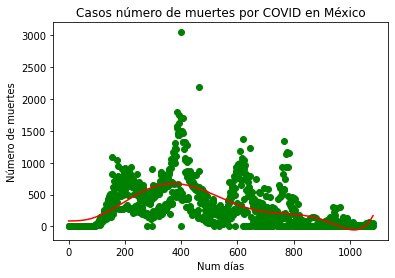

RMSE is 276.07849817297193
r2 is 0.39046546854788733


In [67]:
plt.scatter(X, y, color='green')
plt.plot(X, y_poly_pred, color='red')
plt.title('Casos número de muertes por COVID en México')
plt.xlabel('Num días')
plt.ylabel('Número de muertes')
plt.show()
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE is '+ str(rmse))
print('r2 is '+str(r2))

Recuperados

In [64]:
X = mex_nan['date_num'].values.reshape(-1,1)
y = mex_nan['recovered'].values.reshape(-1,1)
poly=PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

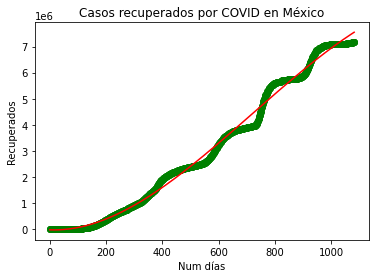

RMSE is 203372.24552237292
r2 is 0.9931550373752929


In [65]:
plt.scatter(X, y, color='green')
plt.plot(X, y_poly_pred, color='red')
plt.title('Casos recuperados por COVID en México')
plt.xlabel('Num días')
plt.ylabel('Recuperados')
plt.show()
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE is '+ str(rmse))
print('r2 is '+str(r2))